<a href="https://colab.research.google.com/github/196883/Bayes_model/blob/master/Probabilistic_Layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Study for Probabilistic Layer of TensorFlow

Here, we study probabilistic neural network model by using tensorflow probability.

## Setting

### Package Import & Setting

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

#For Jupyter Notebook
%matplotlib inline
sns.set_style('whitegrid')
%reload_ext autoreload
%autoreload 2

### Create Data

In [0]:
#Create Data
N = 500
np.random.seed(777)
X = np.random.random((N,2)) * 2 - 1
X_ = X + np.random.normal(scale = 0.1, size=(N,2))
Y = (X_[:,0] ** 2 < X_[:,1]) + 0

np.random.random()はnp.random.random_sample()のエイリアスで、0以上1未満の乱数を生成する。

### Plot Data

In [0]:
#plot
def plot_data(x,y):
    plt.figure(figsize=(5,5))
    plt.scatter(x[y==0,0], x[y==0,1],c = 'blue')
    plt.scatter(x[y==1,0], x[y==1,1], c = 'red')
    plt.plot(np.linspace(-1,1), np.linspace(-1,1)**2)

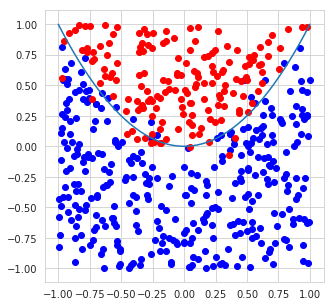

In [18]:
plot_data(X,Y)

## Normal Neural Network

In [20]:
#Create model
in_x = tf.keras.layers.Input(shape = (2,))
x = tf.keras.layers.Dense(10, activation = "tanh")(in_x)
x = tf.keras.layers.Dense(1, activation = "sigmoid")(x)
deterministic_model = tf.keras.Model(in_x,x)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
#Training
deterministic_model.compile(optimizer = "adam",loss = tf.keras.losses.binary_crossentropy)
history = deterministic_model.fit(X,Y,epochs = 2000, verbose = False)#if you want to see the stdout, set verbose = True

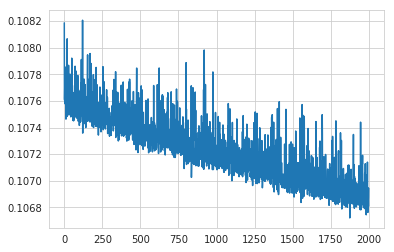

In [24]:
#Plot loss
plt.plot(history.history["loss"])

### See the boundary of deterministic model

In [0]:
#Make Prediction
pred_y = (deterministic_model.predict(X)[:,0] > 0.5) + 0

The predicted data is included in [].

Using [:,0], we can exclude outer[].

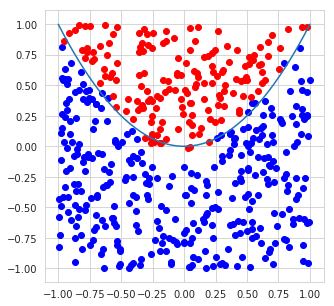

In [39]:
plot_data(X,pred_y)

## Probabilistic Neural Network

import probabilistic layer

    "tensor2tensor.layers.bayes"
    
and set model.

In [40]:
import tensor2tensor.layers.bayes as layers

#Create Model
in_x = tf.keras.layers.Input(shape = (2,), name = "in_x")
x = layers.DenseReparameterization(10, activation = "tanh")(in_x)
x = layers.DenseReparameterization(1, activation = "sigmoid")(x)
probabilistic_model = tf.keras.Model(in_x,x)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



Using "tensor2tensor .layer.bayes", we can easily set probabilistic neural network.

When we use Edward that is one of famous probabilistic model, it is necessary to set prior distribution and posterior distribution.

In [0]:
#Model Training
y_placeholder = tf.placeholder(tf.float32, shape = (None,1), name = "y_true")
loss = tf.reduce_mean(tf.keras.losses.binary_crossentropy(y_placeholder, probabilistic_model.output))
kl = sum([tf.reduce_mean(x) for x in probabilistic_model.losses])
loss = loss + kl * 0.01
train_op = tf.train.AdamOptimizer(0.05).minimize(loss)

reduce_mean:Modelu that calculate sample mean.



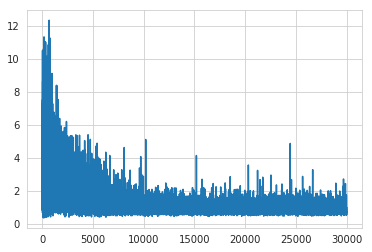

In [50]:
#Model Learning
sess = tf.Session()
sess.run(tf.global_variables_initializer())

losses = []
for _ in range(30000):
    l, _ = sess.run([loss,train_op], feed_dict = {probabilistic_model.input: X, y_placeholder: Y.reshape(-1,1)})
    losses.append(l)
    
plt.plot(losses[10:])

### See the boundary of Probabilistic Model

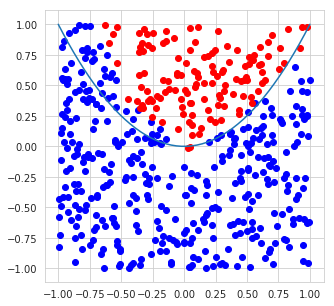

In [51]:
#Model Prediction
pred_y = (sess.run(probabilistic_model.output, feed_dict={probabilistic_model.input: X})[:, 0] > 0.5) + 0
plot_data(X, pred_y)

This model is probabilistic, so that, the values of output are not equal run by run.